In [7]:
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

import skimage.io as sk
from Functions import image_processing as ip
from Functions import region_merging as rm
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from Functions import dice_score as ds
from Functions import unseeded_region_growing as urg
from Functions import old_seeded_region_growing as o_srg
from Functions import segmentation as seg
from PIL import Image
from Functions import visualization as vis



Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
image_intensity_small = sk.imread("Data/N2DH-GOWT1/img/t01.tif")[300:400, 400:500]
image_seeds = sd.seeds(image_intensity_small, 0.5)
image_regions_from_seeds = sd.seed_merging(image_seeds)
image_regions = srg.region_growing(image_intensity_small, image_regions_from_seeds.copy())
image_regions_srg_merged = rm.region_merging(image_regions.copy(), image_intensity_small, 0.05, 500)

image_result_unseeded = urg.unseeded_region_growing_algorithm(image_intensity_small, (0, 0), 5)
image_urg_merged = rm.region_merging(image_result_unseeded.copy(), image_intensity_small, 0.08, 1000)

C:\Users\marie\Documents\Studium\Semester4\Bioinfo\Projekt\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append(np.float((img[p] - img[i, j]) / (img[p] + 0.000001)))


5000


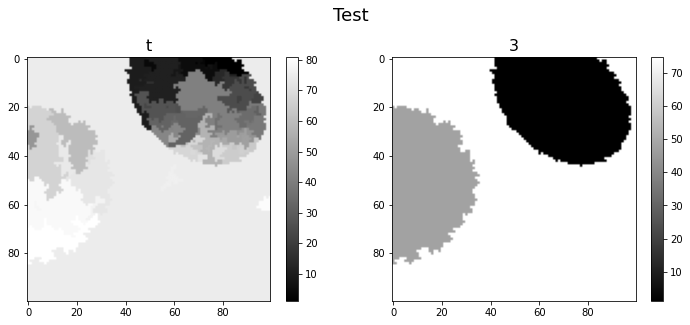

In [37]:
ip.show_test(image_regions, image_regions_srg_merged, 0.9)

In [ ]:
ip.show_two_images_colorbar_labeled(image_regions, image_regions_srg_merged, 0.7)
ip.show_two_images_colorbar_labeled(image_result_unseeded, image_urg_merged, 0.7)

In [10]:
image_gt_new = sk.imread("Data/N2DH-GOWT1/gt/man_seg01.tif")[300:400, 400:500]
print(ds.dice_score(image_regions_srg_merged, image_gt_new))



0.972562599893447


In [ ]:
image_urg_t01_merged_filtered = sk.imread(
        "Result_Pictures/Unseeded_Region_Growing/NIH3T3/dna-42_merging_0.07_10000_median_3.tif")
image_urg_t01_merged_filtered_clipped = ds.final_clipping(image_urg_t01_merged_filtered)

ip.show_two_images_colorbar(image_urg_t01_merged_filtered, image_urg_t01_merged_filtered_clipped, 0.54)


In [ ]:
image_intensity_d3_small = sk.imread("Data/NIH3T3/img/dna-42.png")[730:850, 1100:1300]
gt_data3_small = sk.imread("Data/NIH3T3/gt/42.png")[730:850, 1100:1300]

result_seg_with_bright_spots = seg.seeded_segmentation(image_intensity_d3_small, gt_data3_small, 0.05, 0.1, 400)

ip.show_image(result_seg_with_bright_spots, 15,8)





In [ ]:
image_to_clip = sk.imread("Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_srg_merged_0.05_400.tif")
gt_complete = sk.imread("Data/N2DH-GOWT1/gt/man_seg01.tif")
normal_image = sk.imread("Data/N2DH-GOWT1/img/t01.tif")
image_clipped_complete = ds.final_clipping(image_to_clip.copy())
ip.show_four_images_colorbar(normal_image,image_to_clip, image_clipped_complete, gt_complete, 0.65)

print(ds.evaluate_accuracy_unweighted(image_to_clip.copy(), gt_complete.copy()), ds.evaluate_accuracy_weighted(image_to_clip.copy(), gt_complete.copy()))

In [ ]:
image_final_s = Image.fromarray(image_clipped_complete.copy())
image_final_s.save("Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_srg_final.tif")

In [ ]:
image_urg = sk.imread("Result_Pictures/Unseeded_Region_Growing/N2DH-GOWT1/urg_t01_5.tif")
image_urg_merged = rm.region_merging(image_urg.copy(), normal_image, 0.001, 10000)
image_urg_filter = ip.median_filter(image_urg_merged.copy(), 3)

In [ ]:
image_urg_merged_s = Image.fromarray(image_urg_merged)
image_urg_merged_s.save("Result_Pictures/Unseeded_Region_Growing/N2DH-GOWT1/urg_t01_merged_0.001_10000.tif")

In [ ]:
image_urg_clipped = ds.final_clipping(image_urg_merged.copy())
ip.show_three_images_colorbar(image_urg, image_urg_merged, image_urg_clipped, 0.45)
print(ds.evaluate_accuracy_unweighted(image_urg_merged.copy(), gt_complete.copy()), ds.evaluate_accuracy_weighted(image_urg_merged.copy(), gt_complete.copy()))

In [ ]:
image_urg_clipped_filter = ds.final_clipping(image_urg_filter.copy())
ip.show_four_images_colorbar(image_urg_merged, image_urg_filter, image_urg_clipped, image_urg_clipped_filter, 0.35)
print(ds.evaluate_accuracy_unweighted(image_urg_filter.copy(), gt_complete.copy()), ds.evaluate_accuracy_weighted(image_urg_filter.copy(), gt_complete.copy()))

In [ ]:
image_final_urg_s = Image.fromarray(image_urg_clipped)
image_final_urg_s.save("Result_Pictures/Unseeded_Region_Growing/N2DH-GOWT1/urg_t01_clipped.tif")

image_final_urg_filtered_s = Image.fromarray(image_urg_clipped_filter)
image_final_urg_filtered_s.save("Result_Pictures/Unseeded_Region_Growing/N2DH-GOWT1/urg_t01_filtered_gauss3_clipped.tif")

In [ ]:
image_intensity = sk.imread("Data/NIH3T3/img/dna-42.png")
image_intensity_small = image_intensity[730:850, 1200:1300]
img_removed_spots = ip.remove_bright_spots_with_border(image_intensity_small, 130, 60, 40)
img_removed_spots = ip.gaussian_filter(image_intensity_small.copy(),3)
ip.show_image(image_intensity, 15, 8)

In [ ]:
image_seeds = sd.seeds(img_removed_spots, 0.001)
image_regions = sd.seed_merging(image_seeds.copy())
image_reduced_seeds = sd.reduce_region_number(image_regions.copy(), 4)

ip.show_two_images_colorbar(image_seeds, image_reduced_seeds, 0.6)
image_srg = srg.region_growing(img_removed_spots, image_reduced_seeds.copy())
ip.show_image(image_srg, 15, 8)

In [ ]:
image_merged = rm.region_merging(image_srg.copy(), img_removed_spots, 0.1, 400)
ip.show_three_images_colorbar(img_removed_spots, image_srg, image_merged, 0.45)

In [ ]:
ip.show_image(image_intensity_small, 15, 8)
ip.show_image(img_removed_spots, 15, 8)

In [ ]:
image_seeds = sd.seeds(image_intensity_small, 0.05)
image_p_seeds = sd.seeds(img_removed_spots, 0.05)
ip.show_two_images_colorbar(image_seeds, image_p_seeds, 0.65)

In [ ]:
image_regions = sd.seed_merging(image_seeds)
image_regions_p = sd.seed_merging(image_p_seeds)

In [ ]:
image_srg = srg.region_growing(image_intensity_small, image_regions.copy())
ip.show_image(image_intensity_small, 15, 8)
image_srg_p = srg.region_growing(img_removed_spots, image_regions_p.copy())
ip.show_two_images_colorbar(image_srg, image_srg_p, 0.65)

In [ ]:
results_region_merging_similarity = rm.distance_merging_while(image_srg.copy(), 0.1, image_intensity_small)
image_rm_similarity, inter_region_neighbors, means = results_region_merging_similarity
image_rm_size = rm.region_merging_size(image_intensity_small, image_rm_similarity.copy(), inter_region_neighbors, means, 400)
ip.show_three_images_colorbar(image_srg, image_rm_similarity, image_rm_size, 0.45)

In [ ]:
background_number = ds.find_background_number(image_rm_size.copy())
clipped_segmented_image = ds.segmented_image_clip(image_rm_size.copy(), background_number)
ip.show_image(clipped_segmented_image, 15, 8)

In [ ]:
results_region_merging_similarity_p = rm.distance_merging_while(image_srg_p.copy(), 0.119, img_removed_spots)
image_rm_similarity_p, inter_region_neighbors_p, means_p = results_region_merging_similarity_p
image_rm_size_p = rm.region_merging_size(img_removed_spots, image_rm_similarity_p.copy(), inter_region_neighbors_p, means_p, 400)
ip.show_three_images_colorbar(image_srg_p, image_rm_similarity_p, image_rm_size_p, 0.45)
background_number_p = ds.find_background_number(image_rm_size_p.copy())
clipped_segmented_image_p = ds.segmented_image_clip(image_rm_size_p.copy(), background_number_p)
ip.show_image(ip.median_filter(clipped_segmented_image_p, 3), 15, 8)

In [ ]:
im = Image.fromarray(clipped_segmented_image_p)
im.save("../Result_Pictures/Seeded_Region_Growing/NIH3T3/dna-42_part_bright-spots-removed_final")

In [ ]:
im1 = Image.fromarray(clipped_segmented_image)
im1.save("../Result_Pictures/Seeded_Region_Growing/NIH3T3/dna-42_part_bright-spots_final")

In [ ]:
image_intensity = sk.imread("Data/N2DL-HeLa/img/t52.tif")[300:400, 300:400]
img_gt = sk.imread("Data/N2DL-HeLa/gt/man_seg52.tif")[300:400, 300:400]
#image_intensity = ip.subtract_minimum(image_intensity)

image_seeds = sd.seeds(image_intensity, 0.3)
#image_seeds_s = Image.fromarray(image_seeds)
#image_seeds_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_seeds.tif")
image_for_srg = sd.seed_merging(image_seeds.copy())
#image_for_srg = sd.reduce_region_number(image_for_srg,2)
ip.show_three_images_colorbar(image_seeds, image_for_srg, image_intensity, 0.65)

In [ ]:
image_srg = srg.region_growing(image_intensity, image_for_srg.copy())
#image_srg_s = Image.fromarray(image_srg)
#image_srg_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_srg.tif")
ip.show_two_images_colorbar(image_for_srg, image_srg, 0.65)

In [ ]:
results_region_merging_similarity = rm.distance_merging_while(image_srg.copy(), 0.1, image_intensity)
image_rm_similarity, inter_region_neighbors, means = results_region_merging_similarity
image_rm_size = rm.region_merging_size(image_intensity, image_rm_similarity.copy(), inter_region_neighbors, means, 100)
image_final = ds.final_clipping(image_rm_size.copy())
ip.show_four_images_colorbar(image_srg, image_rm_similarity, image_rm_size, image_final, 0.45)



In [ ]:
image_merged = rm.region_merging(image_srg.copy(), image_intensity, 0.01, 400)
#image_merged_s = Image.fromarray(image_merged)
#image_merged_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_merged.tif")

image_final = ds.final_clipping(image_merged.copy())
#image_final_s = Image.fromarray(image_merged)
#image_final_s.save("../Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/t01_final.tif")

In [ ]:
ip.show_four_images_colorbar(image_intensity, image_srg, image_merged, image_final, 0.45)

In [ ]:
print(ds.evaluate_accuracy_unweighted(image_rm_size.copy(), img_gt), ds.evaluate_accuracy_weighted(image_rm_size.copy(), img_gt))


In [ ]:
image_urg = sk.imread("Result_Pictures/Unseeded_Region_Growing/N2DH-GOWT1/urg_t01_5.tif")
image_urg_small = image_urg[300:400, 400:500]
image_ground_truth = sk.imread("Data/N2DH-GOWT1/gt/man_seg01.tif")
image_ground_truth_small = image_ground_truth[300:400, 400:500]

image_merged_small = rm.region_merging(image_urg_small, image_intensity_small, 0.001, 1000)
score_merged = ds.evaluate_accuracy_weighted(image_merged_small, image_ground_truth_small)

image_merged_filtered_small = ip.median_filter(image_merged_small, 3)
score_filtered = ds.evaluate_accuracy_weighted(image_merged_filtered_small, image_ground_truth_small)

print("Dice score after merging: " + str(score_merged) + "\nDice Score after filtering: " + str(score_filtered))

ip.show_three_images_colorbar(image_urg_small, image_merged_small, image_merged_filtered_small, 0.45)
